In [55]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [56]:
# Cleans the Dataframe
def inp_data(filename):
    data=pd.read_csv(filename,sep=';')
    data=data.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,21,22,23,24,26,27,28,29])
    data['CfgEvaluationType'] = data['CfgEvaluationType'].replace({'FilledCacheProfiling-MAX': 'PPP', 'FilledCacheProfilingSingleHold-MAX': 'SHM', 'FilledCacheProfilingGroupElim-MAX': 'GEM'})
    data=data.drop(['CfgCParam0','CfgCParam1','CfgCParam2','CfgCParam3','CfgEvSetFactor','CfgNExperiments','CfgNProfileRuns','CfgNEvalRuns'], axis=1)
    data=data.drop(['CfgUseFlush','TPR','EvSR','EvSRwEvict','EvSRwFlush','Victim-ExecHits','Victim-ExecMisses','Victim-ExecEvictions','Victim-InvHits'], axis=1)
    data=data.drop(['Victim-RdEvictions','Victim-WrHits','Victim-WrMisses','Victim-WrEvictions','Victim-RdHits','Victim-RdMisses','Victim-InvMisses'], axis=1)
    # data=data.drop(['AttackMem'], axis=1)
    data.insert(
        2, 
        "Access", 
        [
            int(data._get_value(15, "Attacker-RdHits"))+
            int(data._get_value(15, "Attacker-RdMisses"))+
            int(data._get_value(15, "Attacker-RdEvictions"))+
            int(data._get_value(15, "Attacker-WrHits"))+
            int(data._get_value(15, "Attacker-WrMisses"))+
            int(data._get_value(15, "Attacker-WrEvictions"))+
            int(data._get_value(15, "Attacker-ExecHits"))+
            int(data._get_value(15, "Attacker-ExecMisses"))+
            int(data._get_value(15, "Attacker-ExecEvictions")),
            int(data._get_value(20, "Attacker-RdHits"))+
            int(data._get_value(20, "Attacker-RdMisses"))+
            int(data._get_value(20, "Attacker-RdEvictions"))+
            int(data._get_value(20, "Attacker-WrHits"))+
            int(data._get_value(20, "Attacker-WrMisses"))+
            int(data._get_value(20, "Attacker-WrEvictions"))+
            int(data._get_value(20, "Attacker-ExecHits"))+
            int(data._get_value(20, "Attacker-ExecMisses"))+
            int(data._get_value(20, "Attacker-ExecEvictions")),
            int(data._get_value(25, "Attacker-RdHits"))+
            int(data._get_value(25, "Attacker-RdMisses"))+
            int(data._get_value(25, "Attacker-RdEvictions"))+
            int(data._get_value(25, "Attacker-WrHits"))+
            int(data._get_value(25, "Attacker-WrMisses"))+
            int(data._get_value(25, "Attacker-WrEvictions"))+
            int(data._get_value(25, "Attacker-ExecHits"))+
            int(data._get_value(25, "Attacker-ExecMisses"))+
            int(data._get_value(25, "Attacker-ExecEvictions"))
        ], 
        True)
    return data

In [57]:
# create graph function
def createPlot(data_256,data_512,data_1024,data_2048,title):
    labels = ['cl256','cl512','cl1024','cl2048']

    x = np.arange(len(labels))  # the label locations
    width = 0.10  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 1.5*width, [int(data_256._get_value(15,"Access")),int(data_512._get_value(15,"Access")),int(data_1024._get_value(15,"Access")),int(data_2048._get_value(15,"Access"))], width, label='PPP')
    rects2 = ax.bar(x, [int(data_256._get_value(20,"Access")),int(data_512._get_value(20,"Access")),int(data_1024._get_value(20,"Access")),int(data_2048._get_value(20,"Access"))], width, label='SHM')
    rects3 = ax.bar(x + 1.5*width, [int(data_256._get_value(25,"Access")),int(data_512._get_value(25,"Access")),int(data_1024._get_value(25,"Access")),int(data_2048._get_value(25,"Access"))], width, label='GEM')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Accesses')
    ax.set_title(title)
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=15)
    ax.bar_label(rects2, padding=15)
    ax.bar_label(rects3, padding=15)

    fig.tight_layout()
    plt.yscale('log')
    plt.show()

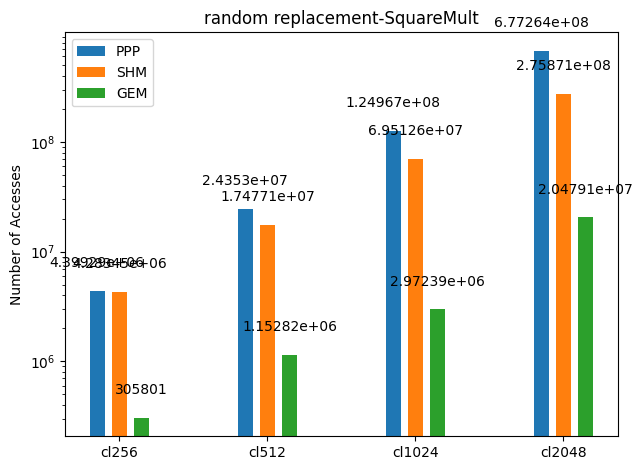

In [75]:
# associative cache - random replacement - SquareMult
data_256=pd.concat([inp_data("./outputs/SquareMult/cl256/assoc_rand.csv")])
data_512=pd.concat([inp_data("./outputs/SquareMult/cl512/assoc_rand.csv")])
data_1024=pd.concat([inp_data("./outputs/SquareMult/cl1024/assoc_rand.csv")])
data_2048=pd.concat([inp_data("./outputs/SquareMult/cl2048/assoc_rand.csv")])
createPlot(data_256,data_512,data_1024,data_2048,"random replacement-SquareMult")

In [76]:
data_2048

,CfgEvaluationType,CfgCacheType,Access,CfgNSets,CfgNWays,CfgReplAlg,AddrFound,AttackMem,Attacker-RdHits,Attacker-RdMisses,Attacker-RdEvictions,Attacker-WrHits,Attacker-WrMisses,Attacker-WrEvictions,Attacker-ExecHits,Attacker-ExecMisses,Attacker-ExecEvictions,Attacker-InvHits,Attacker-InvMisses
15,PPP,associative,677263649,1,2048,random,2048,1048576.0,602308618.0,68914816.0,6040215.0,0,0,0,0,0,0,62876648.0,444535832.0
20,SHM,associative,275871484,1,2048,random,2048,1048576.0,0.0,165937678.0,109933806.0,0,0,0,0,0,0,56005919.0,392260321.0
25,GEM,associative,20479129,1,2048,random,2048,1048576.0,0.0,19541606.0,937523.0,0,0,0,0,0,0,18606130.0,130324430.0


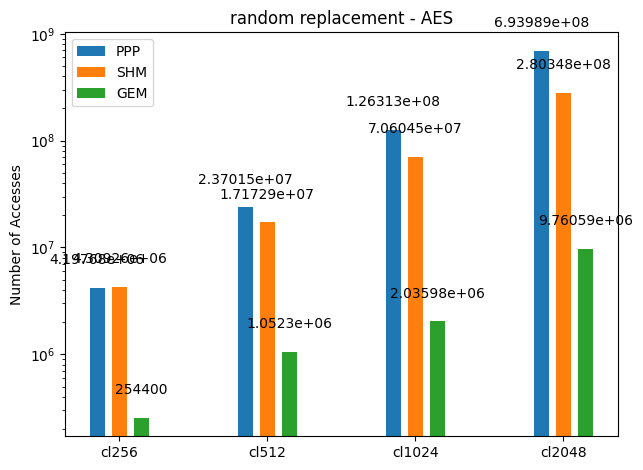

In [59]:
# associative cache - random replacement - AES
data_256=pd.concat([inp_data("./outputs/AES/cl256/assoc_rand.csv")])
data_512=pd.concat([inp_data("./outputs/AES/cl512/assoc_rand.csv")])
data_1024=pd.concat([inp_data("./outputs/AES/cl1024/assoc_rand.csv")])
data_2048=pd.concat([inp_data("./outputs/AES/cl2048/assoc_rand.csv")])
createPlot(data_256,data_512,data_1024,data_2048,"random replacement - AES")

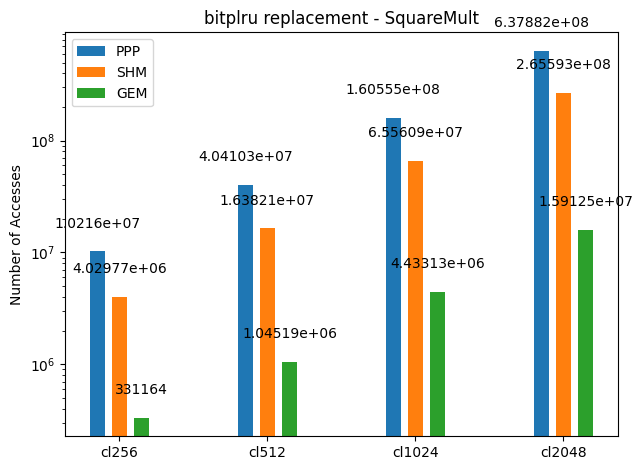

In [60]:
# associative cache - bitplru replacement - SquareMult
data_256=pd.concat([inp_data("./outputs/SquareMult/cl256/assoc_bitplru.csv")])
data_512=pd.concat([inp_data("./outputs/SquareMult/cl512/assoc_bitplru.csv")])
data_1024=pd.concat([inp_data("./outputs/SquareMult/cl1024/assoc_bitplru.csv")])
data_2048=pd.concat([inp_data("./outputs/SquareMult/cl2048/assoc_bitplru.csv")])
createPlot(data_256,data_512,data_1024,data_2048,"bitplru replacement - SquareMult")

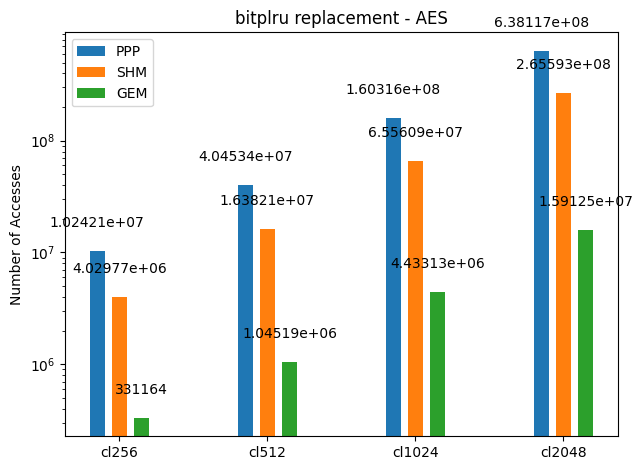

In [68]:
# associative cache - bitplru replacement - AES
data_256=pd.concat([inp_data("./outputs/AES/cl256/assoc_bitplru.csv")])
data_512=pd.concat([inp_data("./outputs/AES/cl512/assoc_bitplru.csv")])
data_1024=pd.concat([inp_data("./outputs/AES/cl1024/assoc_bitplru.csv")])
data_2048=pd.concat([inp_data("./outputs/AES/cl2048/assoc_bitplru.csv")])
createPlot(data_256,data_512,data_1024,data_2048,"bitplru replacement - AES")

In [69]:
data_2048

,CfgEvaluationType,CfgCacheType,Access,CfgNSets,CfgNWays,CfgReplAlg,AddrFound,AttackMem,Attacker-RdHits,Attacker-RdMisses,Attacker-RdEvictions,Attacker-WrHits,Attacker-WrMisses,Attacker-WrEvictions,Attacker-ExecHits,Attacker-ExecMisses,Attacker-ExecEvictions,Attacker-InvHits,Attacker-InvMisses
15,PPP,associative,638116735,1,2048,bit-plru,52,1048576.0,216725616.0,314665258.0,106725861.0,0,0,0,0,0,0,207941451.0,1.469780e+09
20,SHM,associative,265592818,1,2048,bit-plru,2048,1048576.0,0.0,160717489.0,104875329.0,0,0,0,0,0,0,55844207.0,3.911277e+08
25,GEM,associative,15912472,1,2048,bit-plru,2048,1048576.0,0.0,15030607.0,881865.0,0,0,0,0,0,0,14150789.0,9.911180e+07


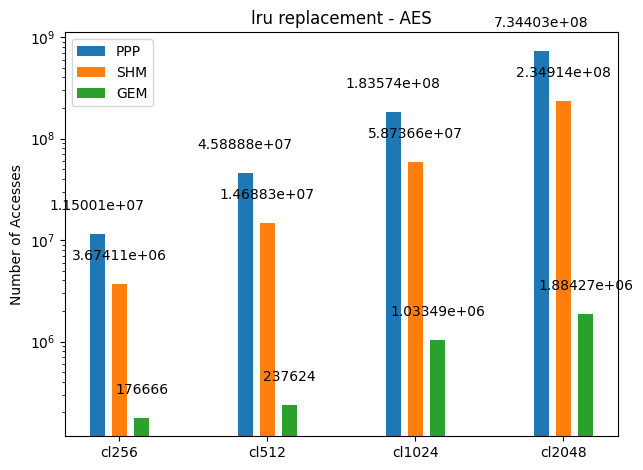

In [70]:
# associative cache - lru replacement - AES
data_256=pd.concat([inp_data("./outputs/AES/cl256/assoc_lru.csv")])
data_512=pd.concat([inp_data("./outputs/AES/cl512/assoc_lru.csv")])
data_1024=pd.concat([inp_data("./outputs/AES/cl1024/assoc_lru.csv")])
data_2048=pd.concat([inp_data("./outputs/AES/cl2048/assoc_lru.csv")])
createPlot(data_256,data_512,data_1024,data_2048,"lru replacement - AES")

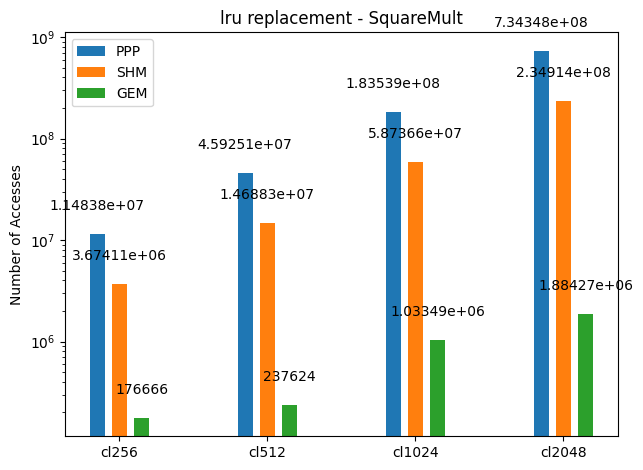

In [71]:
# associative cache - lru replacement - SquareMult
data_256=pd.concat([inp_data("./outputs/SquareMult/cl256/assoc_lru.csv")])
data_512=pd.concat([inp_data("./outputs/SquareMult/cl512/assoc_lru.csv")])
data_1024=pd.concat([inp_data("./outputs/SquareMult/cl1024/assoc_lru.csv")])
data_2048=pd.concat([inp_data("./outputs/SquareMult/cl2048/assoc_lru.csv")])
createPlot(data_256,data_512,data_1024,data_2048,"lru replacement - SquareMult")

In [72]:
data_2048

,CfgEvaluationType,CfgCacheType,Access,CfgNSets,CfgNWays,CfgReplAlg,AddrFound,AttackMem,Attacker-RdHits,Attacker-RdMisses,Attacker-RdEvictions,Attacker-WrHits,Attacker-WrMisses,Attacker-WrEvictions,Attacker-ExecHits,Attacker-ExecMisses,Attacker-ExecEvictions,Attacker-InvHits,Attacker-InvMisses
15,PPP,associative,734348258,1,2048,lru,38,1048576.0,312538844.0,314867609.0,106941805.0,0,0,0,0,0,0,207928320.0,1.469793e+09
20,SHM,associative,234913792,1,2048,lru,2048,1048576.0,0.0,132129792.0,102784000.0,0,0,0,0,0,0,29347839.0,2.055496e+08
25,GEM,associative,1884272,1,2048,lru,2048,1048576.0,0.0,1072128.0,812144.0,0,0,0,0,0,0,262031.0,1.851505e+06


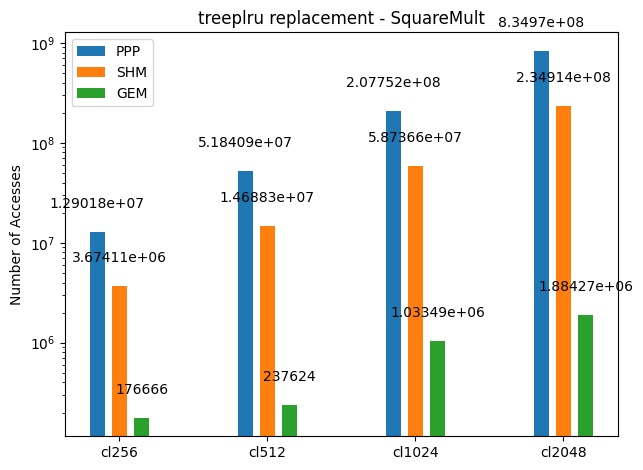

In [73]:
# associative cache - treeplru replacement - AES
data_256=pd.concat([inp_data("./outputs/AES/cl256/assoc_treeplru.csv")])
data_512=pd.concat([inp_data("./outputs/AES/cl512/assoc_treeplru.csv")])
data_1024=pd.concat([inp_data("./outputs/AES/cl1024/assoc_treeplru.csv")])
data_2048=pd.concat([inp_data("./outputs/AES/cl2048/assoc_treeplru.csv")])
createPlot(data_256,data_512,data_1024,data_2048,"treeplru replacement - SquareMult")

In [74]:
data_2048

,CfgEvaluationType,CfgCacheType,Access,CfgNSets,CfgNWays,CfgReplAlg,AddrFound,AttackMem,Attacker-RdHits,Attacker-RdMisses,Attacker-RdEvictions,Attacker-WrHits,Attacker-WrMisses,Attacker-WrEvictions,Attacker-ExecHits,Attacker-ExecMisses,Attacker-ExecEvictions,Attacker-InvHits,Attacker-InvMisses
15,PPP,associative,834969757,1,2048,tree-plru,0,1048576.0,611096978.0,215908071.0,7964708.0,0,0,0,0,0,0,207945410.0,1.469776e+09
20,SHM,associative,234913792,1,2048,tree-plru,2048,1048576.0,0.0,132129792.0,102784000.0,0,0,0,0,0,0,29347839.0,2.055496e+08
25,GEM,associative,1884272,1,2048,tree-plru,2048,1048576.0,0.0,1072128.0,812144.0,0,0,0,0,0,0,262031.0,1.851505e+06
